### Attributes:<br>
**Book Url** : The link to the book.<br>
**Ranking** : The ranking of the book within the overall list of best sellers in the category of Books. <br>
**Book Name** : The name of the book.<br>
**Author** : The name of the Author.<br>
**Price** : Price of the book in dollars.<br>
**Number of Ratings** : Number of ratings the book has got.<br>
**Star Rating** : The star rating the book has got.<br>
**Publication Date** : The date when the book was first published on Amazon.<br>
**Introduction** : The introduction of the book.<br>

In [1]:
# Importing libraries
import time
import random
import pandas as pd
# BeautifulSoup helps extract specific data from web pages by navigating the HTML structure.
from bs4 import BeautifulSoup
# Webdriver helps interact with web browsers (like clicking buttons, rolling pages).
from selenium import webdriver
#By module helps to specify how elements are located in a webpage.
from selenium.webdriver.common.by import By
#Key module helps to send keyboard keys like Enter, Tab, or Arrow Keys to a web element
from selenium.webdriver.common.keys import Keys
# Service module helps configure the Chrome WebDriver.
from selenium.webdriver.chrome.service import Service
# ChromeDriverManager helps manage the versioning and setup of the Chrome WebDriver
from webdriver_manager.chrome import ChromeDriverManager
# Cstomize the behavior of the Chrome browser during automated testing.
from selenium.webdriver.chrome.options import Options

In [2]:
# Function to delay some process, avoid too many requests in a short period of time.
def delay():
    time.sleep(random.uniform(1.0, 2.0))

In [3]:
# Scrolling down the page in order to overcome Lazy Loading
def lazy_loading():
    # Locate  the <body> element of the page, then scrolling actions will be sent to this element.
    element = driver.find_element(By.TAG_NAME, 'body')
    count = 0
    # Loops 2 times to scroll down the page.
    while count < 20:
        element.send_keys(Keys.PAGE_DOWN)
        delay()
        count += 1

In [4]:
# Get links and ranks of books
def get_book_links_and_ranks():
    # Retrieves the HTML content of the current page loaded in the Selenium browser.
    content = driver.page_source
    # Parse the HTML content using BeautifulSoup for easy extraction of elements.
    homepage_soup = BeautifulSoup(content, 'html.parser')
    # 1. Locate the div containing all product elements by the class (p13n-desktop-grid). Like shown in markdown picture
    all_books = homepage_soup.find('div', attrs={"class": "p13n-desktop-grid"})
    # 2. Iterate through books within the grid by ID (gridItemRoot).
    for book_section in all_books.find_all('div', {'id': 'gridItemRoot'}):
        # 3. Locates links of books.
        for book_link in book_section.find_all('a',{'tabindex':'-1'}):
            # some links are not available because they don't have the append 'https://www.amazon.com'
            if book_link['href'].startswith('https:'):
                book_links.append(book_link['href'])
            else:
                book_links.append('https://www.amazon.com' + book_link['href'])
        #4.Locates ranks of the book.
        ranking.append(book_section.find('span',{'class': 'zg-bdg-text'}).text) #Use .find('span', {'class': 'something'}) when you need to search with multiple attributes or when you prefer using a dictionary.


1. Locate the div containing all product elements by the class (p13n-desktop-grid).
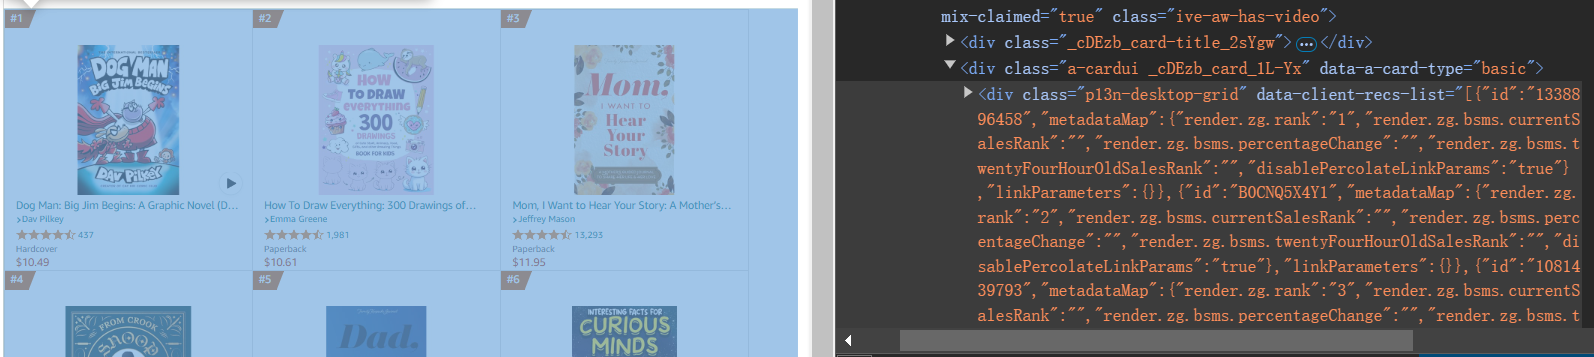
2. Iterate through books within the grid by ID (gridItemRoot)
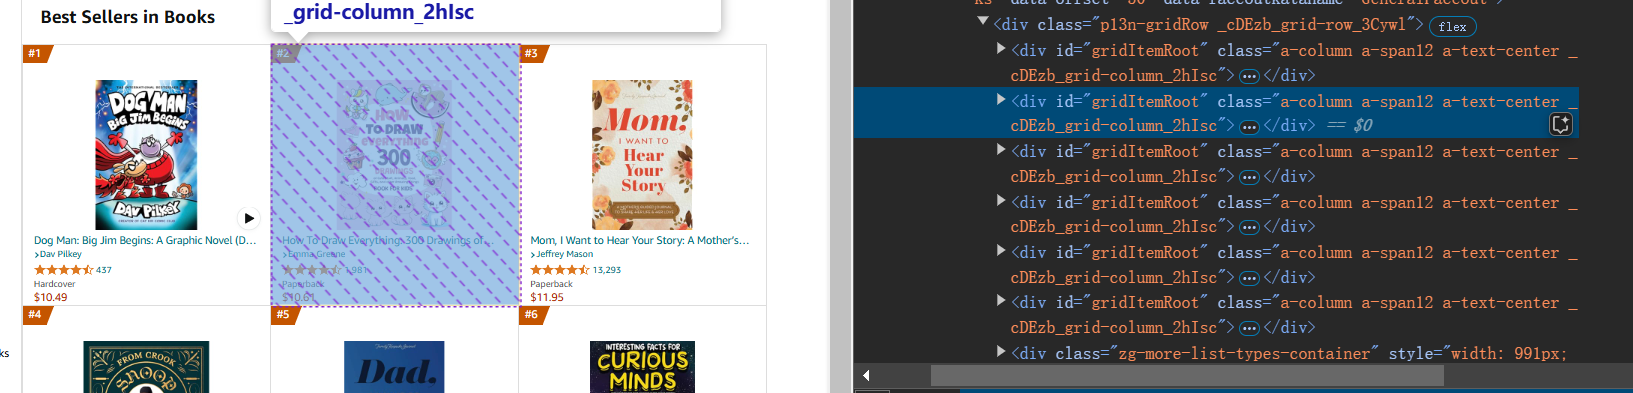
3. Locates links to the book pages.
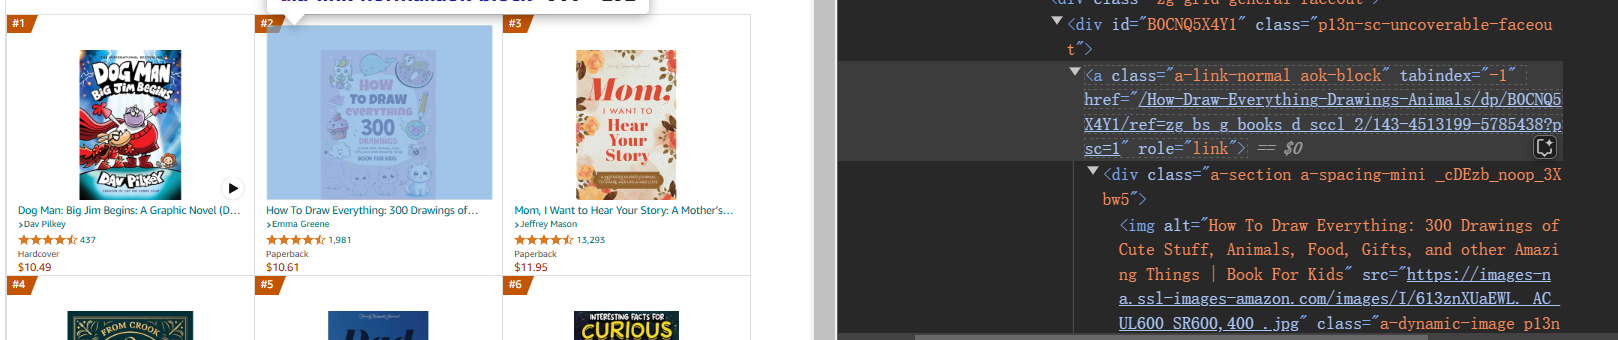
4. Locates ranks of the book.
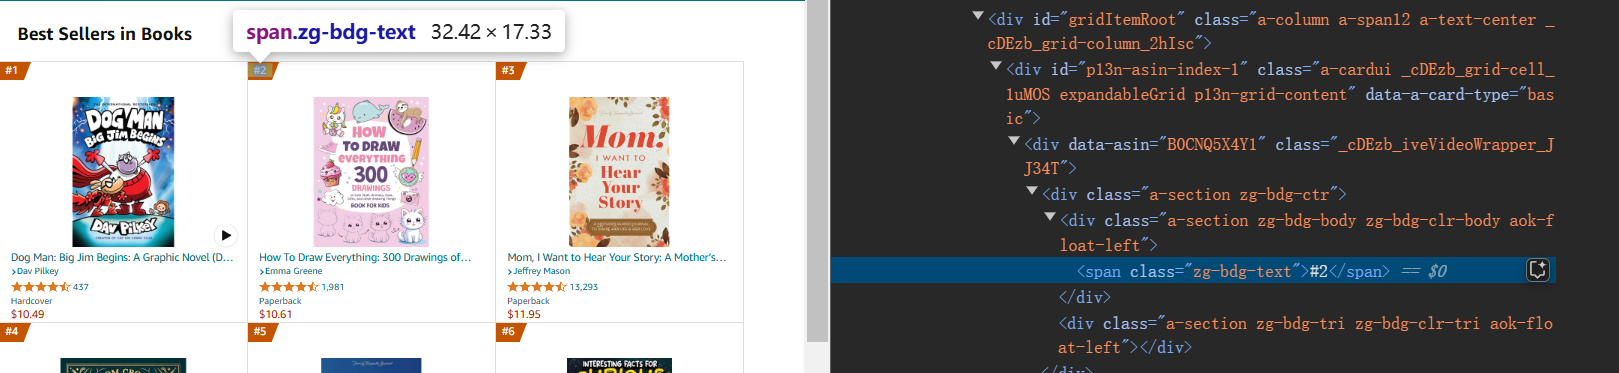

In [5]:
# Set up Chrome WebDriver
options = Options()
options.add_argument("--headless")  # Optional: Run in headless mode (no GUI)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

1. Links to start<br>
https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_1_books?_encoding=UTF8&pg=1<br>
https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_2_books?_encoding=UTF8&pg=2<br>

In [6]:
# Get the links of all books
book_links = []
ranking=[]
for page in range(1,3):               # to iterate over the 2 pages of Best Seller in Books
    start_url = f'https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_{page}_books?_encoding=UTF8&pg={page}'
    driver.get(start_url)
    lazy_loading()                     # to overcome lazy loading
    result = get_book_links_and_ranks()    # to fetch the links to books
print(book_links, ranking)   # print the links and books

['https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/136-8783395-6574141?psc=1', 'https://www.amazon.com/Mom-Want-Hear-Your-Story/dp/1081439793/ref=zg_bs_g_books_d_sccl_2/136-8783395-6574141?psc=1', 'https://www.amazon.com/Dog-Man-Graphic-Creator-Underpants/dp/1338896458/ref=zg_bs_g_books_d_sccl_3/136-8783395-6574141?psc=1', 'https://www.amazon.com/Crook-Cook-Platinum-Recipes-Kitchen/dp/1452179611/ref=zg_bs_g_books_d_sccl_4/136-8783395-6574141?psc=1', 'https://www.amazon.com/Dad-Want-Hear-Your-Story/dp/1070527718/ref=zg_bs_g_books_d_sccl_5/136-8783395-6574141?psc=1', 'https://www.amazon.com/Interesting-Facts-Curious-Minds-Mind-Blowing/dp/B0B6XFT4RH/ref=zg_bs_g_books_d_sccl_6/136-8783395-6574141?psc=1', 'https://www.amazon.com/Big-Book-Silly-Jokes-Kids/dp/1641526378/ref=zg_bs_g_books_d_sccl_7/136-8783395-6574141?psc=1', 'https://www.amazon.com/Difficult-Riddles-Smart-Kids-Families/dp/1546595902/ref=zg_bs_g_books_d_sccl_8/136-8783395-6574

In [7]:
# Creating a dictionary of the required attributes
data_dic = {'book_links': [],'ranking': [], 'book_name': [], 'author': [],'price': [], 'ratings_number': [], 'star_rating': [], 'pub_date':[], 'introduction': []}
data = pd.DataFrame(data_dic)

In [8]:
data['book_links'] = book_links
data['ranking'] = ranking

In [9]:
data

,book_links,ranking,book_name,author,price,ratings_number,star_rating,pub_date,introduction
0,https://www.amazon.com/How-Draw-Everything-Dra...,#1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.amazon.com/Mom-Want-Hear-Your-Stor...,#2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.amazon.com/Dog-Man-Graphic-Creator...,#3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.amazon.com/Crook-Cook-Platinum-Rec...,#4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.amazon.com/Dad-Want-Hear-Your-Stor...,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,https://www.amazon.com/House-Cross-Cross_the-g...,#96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,https://www.amazon.com/Ultimate-Book-Random-Fu...,#97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,https://www.amazon.com/How-Draw-Everything-Sim...,#98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,https://www.amazon.com/Things-Cant-Say-Loud-Me...,#99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Extract content of the page
def extract_content(url):
    driver.get(url) #driver.get(url) method is part of Selenium WebDriver
    page_content = driver.page_source
    book_soup = BeautifulSoup(page_content, 'html.parser')
    return book_soup

Locate the name of book
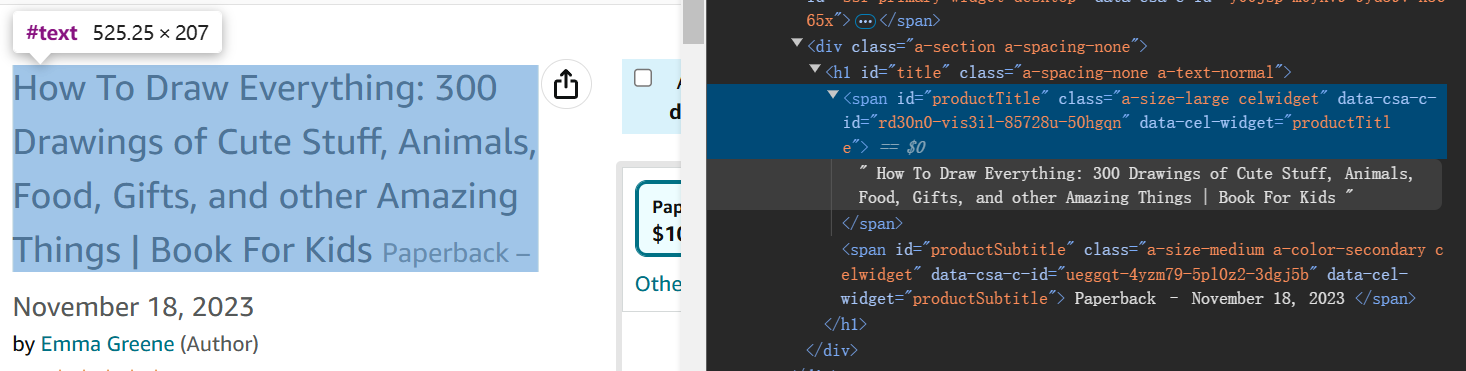

In [11]:
# Extract the book name
def extract_book_name(soup):
    name_of_book = soup.find('span', id = 'productTitle').text.strip()
    return name_of_book

In [12]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_book_name(extract_content(url)))

How To Draw Everything: 300 Drawings of Cute Stuff, Animals, Food, Gifts, and other Amazing Things | Book For Kids


Locate the author
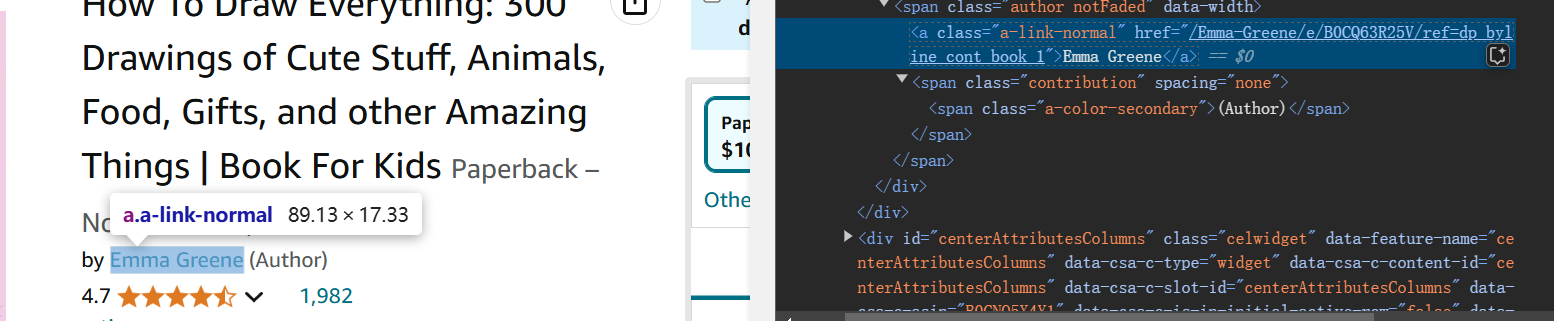

In [13]:
# Extract the author
def extract_author(soup):
    author = soup.find('span', class_='author notFaded').find('a', {'class': 'a-link-normal'}).text.strip()
    return author

In [14]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_author(extract_content(url)))

Emma Greene


Locate price
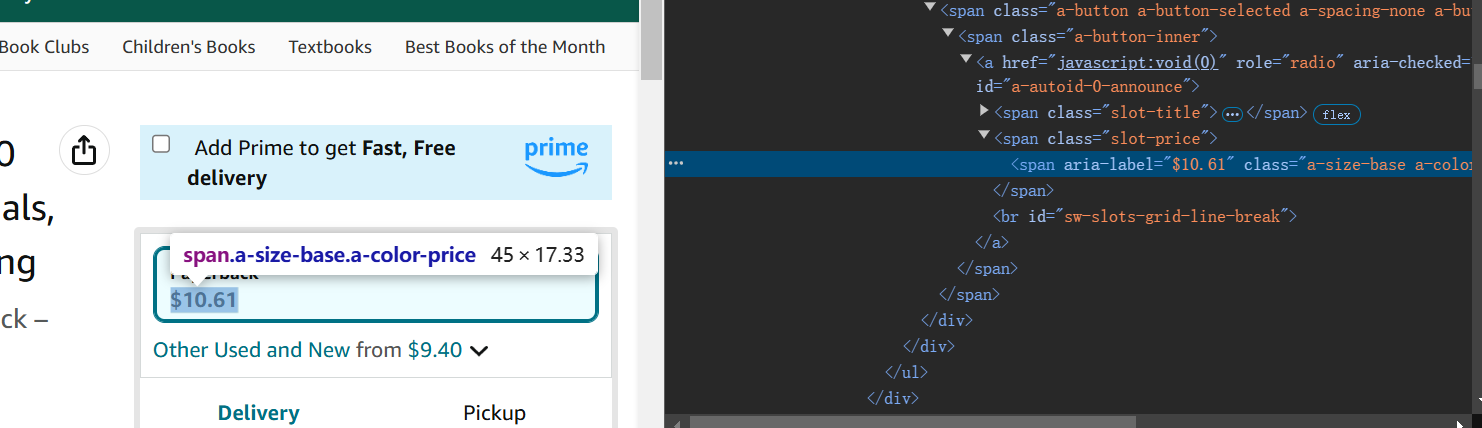

In [15]:
# Extract price
def extract_price(soup):
    price = soup.find('span', class_='slot-price').text.strip() 

In [16]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_price(extract_content(url)))

None


locate rating numbers
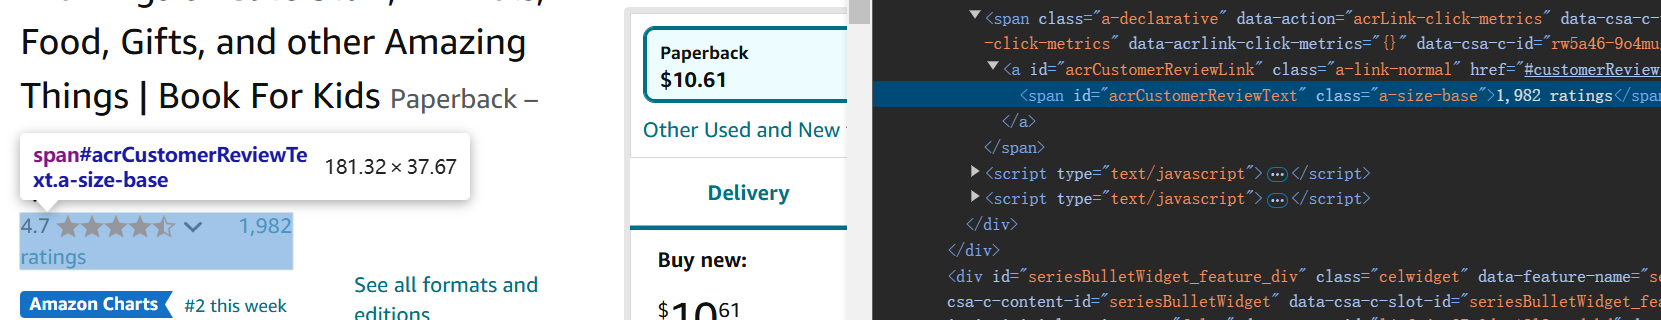

In [17]:
# Extract ratings number
def extract_ratings_number(soup):
    ratings_number = soup.find('span', id="acrCustomerReviewText").text.strip() 
    return ratings_number

In [18]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_ratings_number(extract_content(url)))

1,983 ratings


Locate star_rating
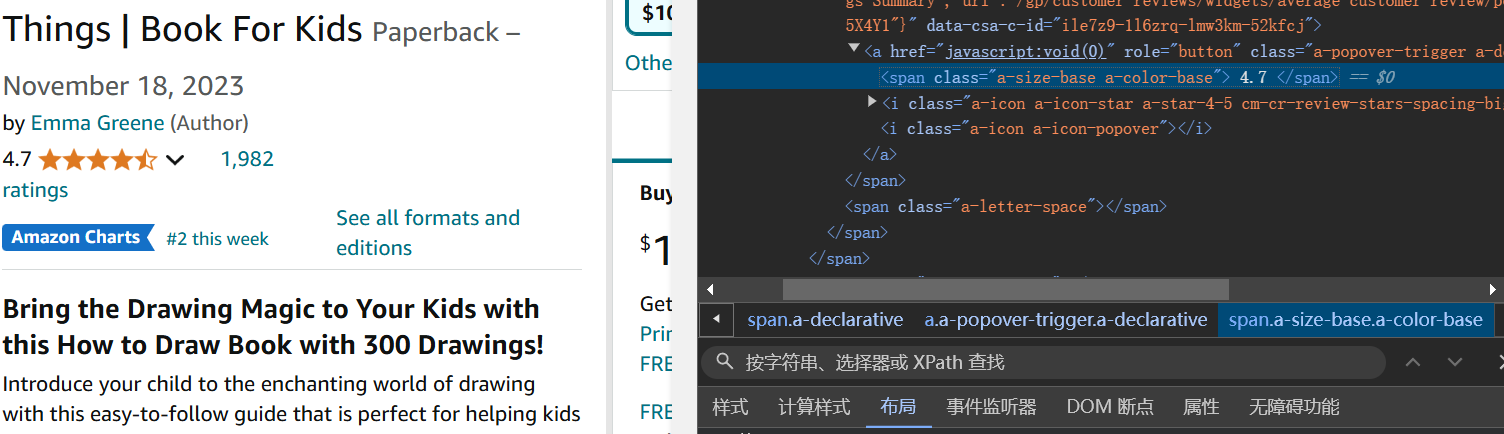

In [19]:
# Extract star_rating
def extract_star_rating(soup):
    star_rating = soup.find('span', id="acrPopover").find('span', class_="a-size-base a-color-base").text.strip() 
    return star_rating

In [20]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_star_rating(extract_content(url)))

4.7


Locate pub_date
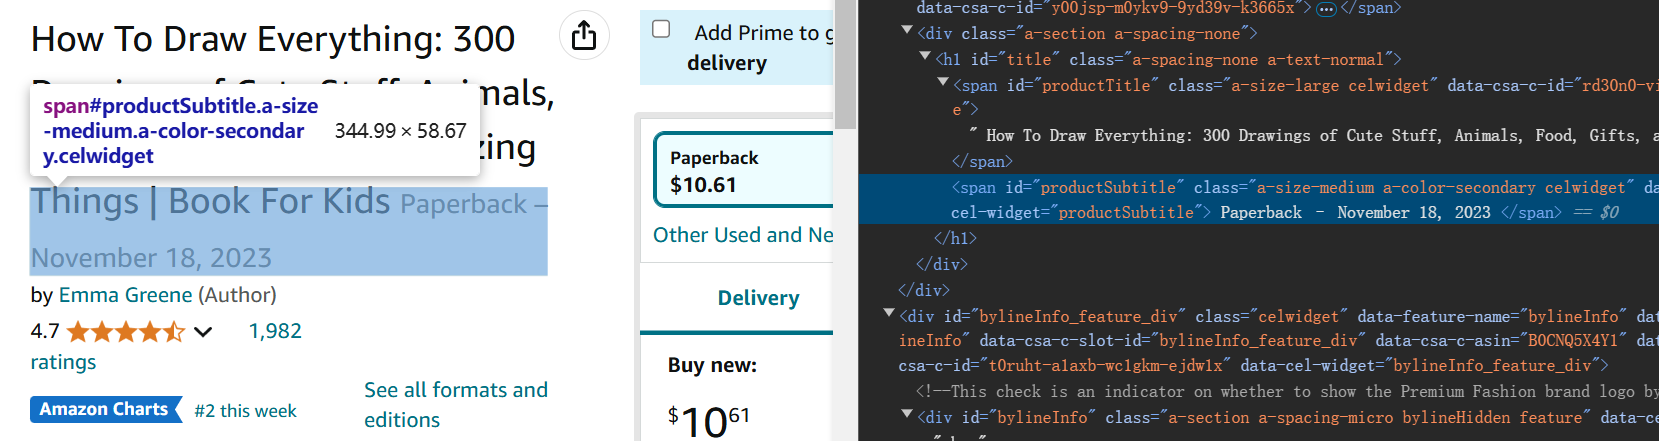

In [21]:
# Extract publication date
import re
def extract_pub_date(soup):
    pub_date = soup.find('span', id="productSubtitle").text.strip() 
    match = re.search(r'(\w+\s\d{1,2},\s\d{4})', pub_date)
    if match:
        date = match.group(0)
        return date
    else:
        return "publication date data not available"

In [22]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_pub_date(extract_content(url)))

November 18, 2023


Locate introduction
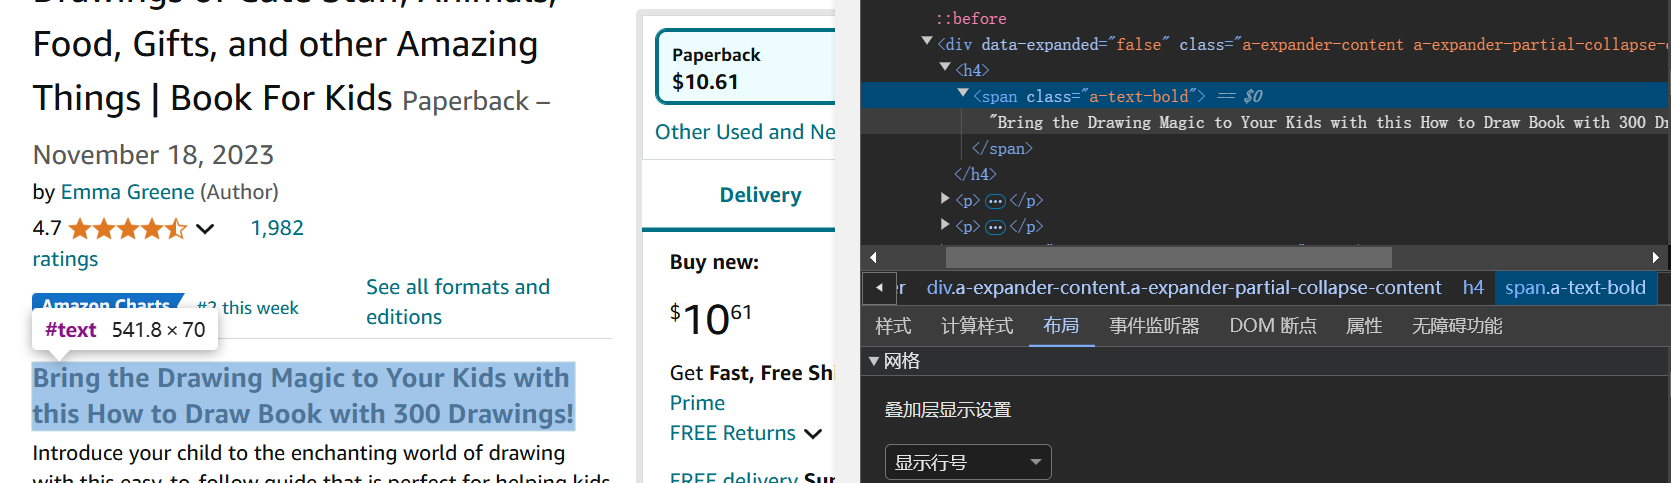

In [23]:
# Extract introduction
def extract_introduction(soup):
    introduction = soup.find('div', id="bookDescription_feature_div").find('span', class_="a-text-bold").text.strip() 
    return introduction

In [24]:
url = "https://www.amazon.com/How-Draw-Everything-Drawings-Animals/dp/B0CNQ5X4Y1/ref=zg_bs_g_books_d_sccl_1/143-4513199-5785438?psc=1"
print(extract_introduction(extract_content(url)))

Bring the Drawing Magic to Your Kids with this How to Draw Book with 300 Drawings!


In [28]:
# Extract content of the page
def extract_content(url):
    driver.get(url) #driver.get(url) method is part of Selenium WebDriver
    page_content = driver.page_source
    book_soup = BeautifulSoup(page_content, 'html.parser')
    return book_soup

# Extract the book name
def extract_book_name(soup):
    try:
        book_name = soup.find('span', id = 'productTitle').text.strip()
    except:
        book_name = None
    data.loc[book, "book_name"] = book_name

# Extract the author
def extract_author(soup):
    try:
        author = soup.find('span', class_='author notFaded').find('a', {'class': 'a-link-normal'}).text.strip()
    except:
        author = None
    data.loc[book, "author"] = author

# Extract price
def extract_price(soup):
    try:
        price = soup.find('span', class_='slot-price').text.strip()
    except:
        price = None
    data.loc[book, "price"] = price

# Extract ratings number
def extract_ratings_number(soup):
    try:
        ratings_number = soup.find('span', id="acrCustomerReviewText").text.strip() 
    except:
        ratings_number = None
    data.loc[book, "ratings_number"] = ratings_number

# Extract star_rating
def extract_star_rating(soup):
    try:
        star_rating = soup.find('span', id="acrPopover").find('span', class_="a-size-base a-color-base").text.strip() 
    except:
        star_rating = None
    data.loc[book, "star_rating"] = star_rating

# Extract publication date
import re
def extract_pub_date(soup):
    try:
        pub_date = soup.find('span', id="productSubtitle").text.strip() 
        match = re.search(r'(\w+\s\d{1,2},\s\d{4})', pub_date)
        if match:
            date = match.group(0)
        else:
            date = None
    except:
        date = None
    data.loc[book, "pub_date"] = date

# Extract introduction
def extract_introduction(soup):
    try:
        introduction = soup.find('div', id="bookDescription_feature_div").find('span', class_="a-text-bold").text.strip() 
    except:
        introduction = None
    data.loc[book, "introduction"] = introduction

for book in range(len(data)):
    book_link = data['book_links'].iloc[book]
    book_content = extract_content(book_link)
    data = data.astype('object')
    extract_book_name(book_content)
    extract_author(book_content)
    extract_price(book_content)
    extract_ratings_number(book_content)
    extract_star_rating(book_content)
    extract_pub_date(book_content)
    extract_introduction(book_content)
    delay()


In [29]:
data

,book_links,ranking,book_name,author,price,ratings_number,star_rating,pub_date,introduction
0,https://www.amazon.com/How-Draw-Everything-Dra...,#1,How To Draw Everything: 300 Drawings of Cute S...,Emma Greene,$10.61,"1,983 ratings",4.7,"November 18, 2023",Bring the Drawing Magic to Your Kids with this...
1,https://www.amazon.com/Mom-Want-Hear-Your-Stor...,#2,"Mom, I Want to Hear Your Story: A Mother’s Gui...",Jeffrey Mason,$16.88,"13,293 ratings",4.7,"July 19, 2019","Give your mom the gift she will love, and you ..."
2,https://www.amazon.com/Dog-Man-Graphic-Creator...,#3,Dog Man: Big Jim Begins: A Graphic Novel (Dog ...,Dav Pilkey,$9.99,443 ratings,4.7,"December 3, 2024","In DOG MAN: BIG JIM BEGINS, discover the origi..."
3,https://www.amazon.com/Crook-Cook-Platinum-Rec...,#4,From Crook to Cook: Platinum Recipes from Tha ...,Snoop Dogg,$0.00,"37,843 ratings",4.8,"October 23, 2018",NEW YORK TIMES
4,https://www.amazon.com/Dad-Want-Hear-Your-Stor...,#5,"Dad, I Want to Hear Your Story: A Father’s Gui...",Jeffrey Mason,$16.79,"7,424 ratings",4.7,"May 27, 2019",The Gift Your Father Will Enjoy and Appreciate
...,...,...,...,...,...,...,...,...,...
95,https://www.amazon.com/House-Cross-Cross_the-g...,#96,The House of Cross: Meet the hero of the new P...,James Patterson,$14.99,"3,028 ratings",4.6,"November 25, 2024",Supreme Court candidates are being murdered—an...
96,https://www.amazon.com/Ultimate-Book-Random-Fu...,#97,The Ultimate Book of Random Fun Facts: Over 10...,Bill O'Neill,$0.00,88 ratings,4.6,"July 5, 2024",Behold! Prepare to have your brain blown!
97,https://www.amazon.com/How-Draw-Everything-Sim...,#98,How To Draw Everything: 600 Simple Step By Ste...,Bryce Ross,$14.73,"1,405 ratings",4.6,"September 18, 2022",Give your LITTLE one the skills needed to be a...
98,https://www.amazon.com/Things-Cant-Say-Loud-Me...,#99,Things I Can't Say Out Loud In Meetings: Funny...,Taylor A. Wilde,$6.95,596 ratings,4.5,"October 8, 2023",A Fun Office Notebook: Perfect for Gifting to ...


'Reading age','Print length', 'Language', 'Dimensions','cover picture' can also be scraped if necessary. 